In [1]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
%matplotlib inline

# we will ignore pandas warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
ordersExport = pd.read_csv('orders_export.csv')
productsExport = pd.read_csv('products_export.csv')

In [3]:
df_order = ordersExport[['Name', 'Lineitem quantity', 'Lineitem name', 'Lineitem sku']]
print(df_order.shape)
df_order.head()

(118, 4)


,Name,Lineitem quantity,Lineitem name,Lineitem sku
0,#2891,1,Betwa Kurta - XL,HOD0011
1,#2891,1,Bhagirathi pants - XXL,HOD0444
2,#2891,1,Kosi Kurta - XL,HOD0005
3,#2892,1,Panzara kurta - XXL,HOD0126
4,#2893,1,Betwa Kurta - S,HOD0008


In [4]:
productsExport = productsExport[productsExport['Tags'].isnull() == False]
productsExport = productsExport[productsExport['Published'] == True]
print(productsExport.shape)
productsExport.head(2)

(134, 49)


,Handle,Title,Body (HTML),Vendor,Standardized Product Type,Custom Product Type,Tags,Published,Option1 Name,Option1 Value,...,Google Shopping / Custom Label 0,Google Shopping / Custom Label 1,Google Shopping / Custom Label 2,Google Shopping / Custom Label 3,Google Shopping / Custom Label 4,Variant Image,Variant Weight Unit,Variant Tax Code,Cost per item,Status
0,ishya-blockprinted-kurta-set,Ishya Blockprinted Kurta (Set of 2),"<p data-mce-fragment=""1""><strong data-mce-frag...",House Of Dhaaga,NaN,Kurta Sets,"Category_Kurta Sets, Category_Women, Collectio...",True,Size,XS,...,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,NaN,active
10,ahaana-blockprinted-kurta-set,Ahaana Blockprinted Kurta (Set of 2),"<p data-mce-fragment=""1""><strong data-mce-frag...",House Of Dhaaga,NaN,Kurta Sets,"Category_Kurta Sets, Category_Women, Collectio...",True,Size,XS,...,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,NaN,active


In [5]:
df_product = productsExport[['Handle', 'Title', 'Tags', 'Variant SKU']]
print(df_product.shape)
df_product.head()

(134, 4)


,Handle,Title,Tags,Variant SKU
0,ishya-blockprinted-kurta-set,Ishya Blockprinted Kurta (Set of 2),"Category_Kurta Sets, Category_Women, Collectio...",HOD0772
10,ahaana-blockprinted-kurta-set,Ahaana Blockprinted Kurta (Set of 2),"Category_Kurta Sets, Category_Women, Collectio...",HOD0766
21,seher-blockprinted-kurta-set,Seher Blockprinted Kurta (Set of 2),"Category_Kurta Sets, Category_Women, Collectio...",HOD0760
29,mihira-blockprinted-kurta-set,Mihira Blockprinted Kurta (Set of 3),"Category_Kurta Sets, Category_Women, Collectio...",HOD0754
41,bahar-blockprinted-kurta-set,Bahar Blockprinted Kurta (Set of 3),"Category_Kurta Sets, Category_Women, Collectio...",HOD0748


In [6]:
final_product = df_product

In [7]:
final_product['Handle'] = final_product['Handle'].apply(lambda x: [str.lower(i.replace("-", "")) for i in x])
final_product['Handle'] = final_product['Handle'].apply(lambda x: ''.join(x))
final_product['Handle']

0           ishyablockprintedkurtaset
10         ahaanablockprintedkurtaset
21          seherblockprintedkurtaset
29         mihirablockprintedkurtaset
41          baharblockprintedkurtaset
                    ...              
844            alinewhiteandbluekurta
850    longstraightpeachandwhitekurta
856            longstraightwhitekurta
862            straightbluewhitekurta
868                    peachfuldesire
Name: Handle, Length: 134, dtype: object

In [8]:
final_product['Title'] = final_product['Title'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
final_product['Title'] = final_product['Title'].apply(lambda x: ''.join(x))
final_product['Title'][0:10]

0      ishyablockprintedkurta(setof2)
10    ahaanablockprintedkurta(setof2)
21     seherblockprintedkurta(setof2)
29    mihirablockprintedkurta(setof3)
41     baharblockprintedkurta(setof3)
55      keyablockprintedkurta(setof3)
70                         ektakaftan
76                        barnakaftan
82                   saukhayadakaftan
88                       chesnakaftan
Name: Title, dtype: object

In [9]:
final_product['Tags'] = final_product['Tags'].apply(lambda x: [str.lower(i.replace("_", "")) for i in x])
final_product['Tags'] = final_product['Tags'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
final_product['Tags'] = final_product['Tags'].apply(lambda x: ''.join(x))
final_product['Tags'] = final_product['Tags'].apply(lambda x: [str.lower(i.replace(",", " ")) for i in x])
final_product['Tags'] = final_product['Tags'].apply(lambda x: ''.join(x))
final_product['Tags'][0]

'categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k'

In [10]:
final_product['description'] = final_product['Handle'] + " " + final_product['Title'] + " " + final_product['Tags']
final_product['description'] = final_product['description'].fillna('')
final_product['description'][0]

'ishyablockprintedkurtaset ishyablockprintedkurta(setof2) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k'

In [11]:
final_product = final_product[['Variant SKU', 'description']]
final_product.head()

,Variant SKU,description
0,HOD0772,ishyablockprintedkurtaset ishyablockprintedkur...
10,HOD0766,ahaanablockprintedkurtaset ahaanablockprintedk...
21,HOD0760,seherblockprintedkurtaset seherblockprintedkur...
29,HOD0754,mihirablockprintedkurtaset mihirablockprintedk...
41,HOD0748,baharblockprintedkurtaset baharblockprintedkur...


In [12]:
df_merge = df_order.merge(final_product, how='inner', left_on='Lineitem sku', right_on='Variant SKU')
df_merge['Name'] = df_merge['Name'].str.replace('#', '')
print(df_merge.shape)
df_merge.head()

(32, 6)


,Name,Lineitem quantity,Lineitem name,Lineitem sku,Variant SKU,description
0,2898,1,Green Car Cotton Shirt - S,HOD0607,HOD0607,greencarcottonshirt greencarcottonshirt catego...
1,2898,1,Light Blue Cotton Shirt - S,HOD0575,HOD0575,lightbluecottonshirt lightbluecottonshirt cate...
2,2932,1,Light Blue Cotton Shirt - S,HOD0575,HOD0575,lightbluecottonshirt lightbluecottonshirt cate...
3,2898,1,Olive Green Cotton Shirt - S,HOD0579,HOD0579,olivegreencottonshirt olivegreencottonshirt ca...
4,2898,1,Red Flower Cotton Shirt - S,HOD0615,HOD0615,redflowercottonshirt redflowercottonshirt cate...


In [13]:
final = df_merge[['Name', 'Variant SKU', 'Lineitem quantity', 'description']]
final.head()

,Name,Variant SKU,Lineitem quantity,description
0,2898,HOD0607,1,greencarcottonshirt greencarcottonshirt catego...
1,2898,HOD0575,1,lightbluecottonshirt lightbluecottonshirt cate...
2,2932,HOD0575,1,lightbluecottonshirt lightbluecottonshirt cate...
3,2898,HOD0579,1,olivegreencottonshirt olivegreencottonshirt ca...
4,2898,HOD0615,1,redflowercottonshirt redflowercottonshirt cate...


In [14]:
group = final.groupby(['Name', 'Variant SKU']).sum().reset_index()
group.head()

,Name,Variant SKU,Lineitem quantity
0,2898,HOD0575,1
1,2898,HOD0579,1
2,2898,HOD0607,1
3,2898,HOD0615,1
4,2898,HOD0635,1


In [15]:
#Count number of products and number of customers in the reduced dataset 
no_products = len(group['Variant SKU'].unique())
no_customers = len(group['Name'].unique())
print('Number of customers in dataset:', no_customers)
print('Number of products in dataset:', no_products)

Number of customers in dataset: 13
Number of products in dataset: 28


In [16]:
#Turn raw data to pivot ('ratings' matrix)
ratings = group.pivot(index = 'Name', columns='Variant SKU', values='Lineitem quantity').fillna(0).astype('int')
ratings

Variant SKU,HOD0007,HOD0031,HOD0037,HOD0079,HOD0103,HOD0157,HOD0217,HOD0229,HOD0271,HOD0397,...,HOD0607,HOD0615,HOD0631,HOD0635,HOD0647,HOD0742,HOD0748,HOD0754,HOD0766,HOD0772
Name,,,,,,,,,,,,,,,,,,,,,
2898,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2929,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [17]:
#Binarize the ratings matrix (indicate only if a customer has purchased a product or not)
ratings_binary = ratings.copy()
ratings_binary[ratings_binary != 0] = 1

In [18]:
#Initialize zeros dataframe for product interactions
products_integer = np.zeros((no_products,no_products))

#Count how many times each product pair has been purchased
print('Counting how many times each pair of products has been purchased...')
for i in range(no_products):
    for j in range(no_products):
        if i != j:
            df_ij = ratings_binary.iloc[:,[i,j]] #create a temporary df with only i and j products as columns
            sum_ij = df_ij.sum(axis=1)
            pairings_ij = len(sum_ij[sum_ij == 2]) #if s1_ij == 2 it means that both products were purchased by the same customer
            products_integer[i,j] = pairings_ij
            products_integer[j,i] = pairings_ij

Counting how many times each pair of products has been purchased...


In [75]:
products_integer

array([[0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [19]:
#Count how many customers have purchased each item
print('Counting how many times each individual product has been purchased...')
times_purchased = products_integer.sum(axis = 1)

Counting how many times each individual product has been purchased...


In [76]:
times_purchased

array([2., 2., 5., 8., 1., 3., 2., 5., 5., 3., 3., 3., 0., 1., 0., 0., 4.,
       4., 4., 4., 1., 4., 1., 3., 3., 3., 5., 5.])

In [20]:
#Construct final weighted matrix of item interactions
print('Building weighted product matrix...')
products_weighted = np.zeros((no_products,no_products))
for i in range(no_products):
    for j in range(no_products):
        if (times_purchased[i]+times_purchased[j]) !=0: #make sure you do not divide with zero
            products_weighted[i,j] = (products_integer[i,j])/(times_purchased[i]+times_purchased[j])

Building weighted product matrix...


In [77]:
products_weighted

array([[0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07692308, 0.        ,
        0.        , 0.        , 0.1       , 0.1       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
#Get list of item labels (instead of Codes)
nodes_codes = np.array(ratings_binary.columns).astype('str')
item_lookup_dict = pd.Series(final['description'].values,index=final['Variant SKU']).to_dict()
nodes_labels = [item_lookup_dict[code] for code in nodes_codes]

In [78]:
nodes_codes

array(['HOD0007', 'HOD0031', 'HOD0037', 'HOD0079', 'HOD0103', 'HOD0157',
       'HOD0217', 'HOD0229', 'HOD0271', 'HOD0397', 'HOD0421', 'HOD0433',
       'HOD0538', 'HOD0542', 'HOD0544', 'HOD0548', 'HOD0575', 'HOD0579',
       'HOD0607', 'HOD0615', 'HOD0631', 'HOD0635', 'HOD0647', 'HOD0742',
       'HOD0748', 'HOD0754', 'HOD0766', 'HOD0772'], dtype='<U7')

In [80]:
nodes_labels

['straightbluewhitekurta betwakurta categorykurta categorywomen collectionnadiyankinare colorblue colorwhite necktypedeepround price1kto2k sale stylestraightcut',
 'alinewhiteandantiquemoss hooglykurta categorykurta categorywomen colorantiquemoss colorwhite necktyperound price1kto2k sale stylealine',
 'longstraightbrowncolor dodakurta categorykurta categorywomen collectionnadiyankinare colorbrown necktypeboat price1kto2k sale stylestraightcut',
 'draskurta draskurta categorykurta categorywomen collectionnadiyankinare colorlightpink necktypevneck price1kto2k sale stylekneelength',
 'vaigaikurta vaigaikurta categorykurta categorywomen collectionnadiyankinare colorantiquemoss colorblue necktyperoundneck price1kto2k styleshortkali',
 'hemavatikurta hemavatikurta categorykurta categorywomen collectionnadiyankinare colordarkgrey colorwhite necktyperoundneckslit price1kto2k sale styleprincesscut',
 'gomaikurta gomaikurta categorykurta categorywomen collectionnadiyankinare colororange colorwhi

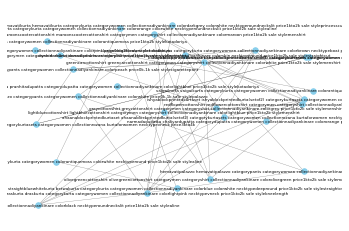

In [22]:
#Create Graph object using the weighted product matrix as adjacency matrix
G = nx.from_numpy_matrix(products_weighted)
pos=nx.random_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = nodes_labels[idx]

nx.draw_networkx_nodes(G, pos , node_color="skyblue", node_size=30)
nx.draw_networkx_edges(G, pos,  edge_color='k', width= 0.3, alpha= 0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=4)
plt.axis('off')
plt.show() # display

In [23]:
#Export graph to Gephi
H=nx.relabel_nodes(G,labels) #create a new graph with Description labels and save to Gephi for visualizations
nx.write_gexf(H, "products.gexf")

In [85]:
print(H)

Graph with 28 nodes and 42 edges


In [24]:
#Find communities of nodes (products)
partition = community_louvain.best_partition(G, resolution = 1.5)
values = list(partition.values())

In [25]:
#Check how many communities were created
print('Number of communities:', len(np.unique(values)))

Number of communities: 10


In [26]:
#Create dataframe with product description and community id
products_communities = pd.DataFrame(nodes_labels, columns = ['product_description'])
products_communities['community_id'] = values

In [88]:
products_communities

,product_description,community_id
0,straightbluewhitekurta betwakurta categorykurt...,6
1,alinewhiteandantiquemoss hooglykurta categoryk...,6
2,longstraightbrowncolor dodakurta categorykurta...,8
3,draskurta draskurta categorykurta categorywome...,8
4,vaigaikurta vaigaikurta categorykurta category...,2
5,hemavatikurta hemavatikurta categorykurta cate...,9
6,gomaikurta gomaikurta categorykurta categorywo...,6
7,palarkurta palarkurta categorykurta categorywo...,8
8,damodarkurta damodarkurta categorykurta catego...,8
9,hemavatipalazzo hemavatipalazzo categorypants ...,9


In [27]:
#Lets take a peek at community 1
products_communities[products_communities['community_id']==1].head(15)

,product_description,community_id
12,narmadadupatta chaliyardupatta categorydupatta...,1


In [28]:
#Lets now divide each element in products_weighted dataframe with the maximum of each row.
#This will normalize values in the row and we can perceive it as the possibility af a customer also buying
#product in column j after showing interest for the product in row i

#Turn into dataframe
products_weighted_pd = pd.DataFrame(products_weighted, columns = nodes_labels)
products_weighted_pd.set_index(products_weighted_pd.columns, 'product', inplace=True)
products_prob = products_weighted_pd.divide(products_weighted_pd.max(axis = 1), axis = 0)

In [42]:
products_prob

,straightbluewhitekurta betwakurta categorykurta categorywomen collectionnadiyankinare colorblue colorwhite necktypedeepround price1kto2k sale stylestraightcut,alinewhiteandantiquemoss hooglykurta categorykurta categorywomen colorantiquemoss colorwhite necktyperound price1kto2k sale stylealine,longstraightbrowncolor dodakurta categorykurta categorywomen collectionnadiyankinare colorbrown necktypeboat price1kto2k sale stylestraightcut,draskurta draskurta categorykurta categorywomen collectionnadiyankinare colorlightpink necktypevneck price1kto2k sale stylekneelength,vaigaikurta vaigaikurta categorykurta categorywomen collectionnadiyankinare colorantiquemoss colorblue necktyperoundneck price1kto2k styleshortkali,hemavatikurta hemavatikurta categorykurta categorywomen collectionnadiyankinare colordarkgrey colorwhite necktyperoundneckslit price1kto2k sale styleprincesscut,gomaikurta gomaikurta categorykurta categorywomen collectionnadiyankinare colororange colorwhite necktyperoundneckslit price1kto2k sale stylealine,palarkurta palarkurta categorykurta categorywomen collectionnadiyankinare colorblack necktyperoundneckslit price1kto2k sale stylealine,damodarkurta damodarkurta categorykurta categorywomen collectionnadiyankinare colorskin necktyperound price1kto2k sale stylestraightcut,hemavatipalazzo hemavatipalazzo categorypants categorywomen collectionnadiyankinare colorgrey colorwhite price0k-1k sale stylepalazzo,...,greencarcottonshirt greencarcottonshirt categorymen categoryshirt collectionnadiyankinare colorwhite price1kto2k sale stylemenshirt,redflowercottonshirt redflowercottonshirt categorymen categoryshirt collectionnadiyankinare colorwhite price1kto2k sale stylemenshirt,pinkcottonshirt pinkcottonshirt categorymen categoryshirt collectionnadiyankinare colorpink price1kto2k sale stylemenshirt,maroonscootercottonshirt maroonscootercottonshirt categorymen categoryshirt collectionnadiyankinare colormaroon price1kto2k sale stylemenshirt,greycottonshirt greycottonshirt categorymen categoryshirt collectionnadiyankinare colorgrey price1kto2k sale stylemenshirt,keyablockprintedkurtaset keyablockprintedkurta(setof3) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k,baharblockprintedkurtaset baharblockprintedkurta(setof3) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k,mihirablockprintedkurtaset mihirablockprintedkurta(setof3) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k,ahaanablockprintedkurtaset ahaanablockprintedkurta(setof2) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k,ishyablockprintedkurtaset ishyablockprintedkurta(setof2) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k
straightbluewhitekurta betwakurta categorykurta categorywomen collectionnadiyankinare colorblue colorwhite necktypedeepround price1kto2k sale stylestraightcut,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
alinewhiteandantiquemoss hooglykurta categorykurta categorywomen colorantiquemoss colorwhite necktyperound price1kto2k sale stylealine,1.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
longstraightbrowncolor dodakurta categorykurta categorywomen collectionnadiyankinare colorbrown necktypeboat price1kto2k sale stylestraightcut,0.0,0.0,0.000000,0.769231,0.0,0.0,0.0,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
draskurta draskurta categorykurta categorywomen collectionnadiyankinare colorlightpink necktypevneck price1kto2k sale stylekneelength,0.0,0.0,0.846154,0.000000,0.0,1.0,0.0,0.846154,0.846154,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.846154,0.846154
vaigaikurta vaigaikurta categorykurta categorywomen collectionnadiyankinare colorantiquemoss colorblue necktyperoundneck price1kto2k styleshortkali,0

In [35]:
basket = final[final['Variant SKU'] == 'HOD0607']['description']
basket.tolist()

['greencarcottonshirt greencarcottonshirt categorymen categoryshirt collectionnadiyankinare colorwhite price1kto2k sale stylemenshirt']

In [70]:
#Now lets select a hypothetical basket of goods (one or more products) that a customer has already purchased or
#shown an interest for by clicking on an add or something, and then suggest him relative ones
def getRecommendation(sku):
    desc = final[final['Variant SKU'] == 'HOD0607']['description']
    basket = desc.tolist()
    #Also select the number of relevant items to suggest
    no_of_suggestions = 5

    all_of_basket = products_prob[basket]
#     print(all_of_basket)
    all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
    suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

    return suggestions_to_customer

In [71]:
recommendation = getRecommendation('HOD0607')
print(recommendation)

['lightbluecottonshirt lightbluecottonshirt categorymen categoryshirt collectionnadiyankinare colorlightblue price1kto2k stylemenshirt', 'maroonscootercottonshirt maroonscootercottonshirt categorymen categoryshirt collectionnadiyankinare colormaroon price1kto2k sale stylemenshirt', 'redflowercottonshirt redflowercottonshirt categorymen categoryshirt collectionnadiyankinare colorwhite price1kto2k sale stylemenshirt', 'olivegreencottonshirt olivegreencottonshirt categorymen categoryshirt collectionnadiyankinare colorolivegreen price1kto2k sale stylemenshirt', 'straightbluewhitekurta betwakurta categorykurta categorywomen collectionnadiyankinare colorblue colorwhite necktypedeepround price1kto2k sale stylestraightcut']


In [72]:
for i in recommendation:
    print(i)

lightbluecottonshirt lightbluecottonshirt categorymen categoryshirt collectionnadiyankinare colorlightblue price1kto2k stylemenshirt
maroonscootercottonshirt maroonscootercottonshirt categorymen categoryshirt collectionnadiyankinare colormaroon price1kto2k sale stylemenshirt
redflowercottonshirt redflowercottonshirt categorymen categoryshirt collectionnadiyankinare colorwhite price1kto2k sale stylemenshirt
olivegreencottonshirt olivegreencottonshirt categorymen categoryshirt collectionnadiyankinare colorolivegreen price1kto2k sale stylemenshirt
straightbluewhitekurta betwakurta categorykurta categorywomen collectionnadiyankinare colorblue colorwhite necktypedeepround price1kto2k sale stylestraightcut


In [73]:
recommendsku = final.drop_duplicates(subset=['Variant SKU'])
recommendsku

,Name,Variant SKU,Lineitem quantity,description
0,2898,HOD0607,1,greencarcottonshirt greencarcottonshirt catego...
1,2898,HOD0575,1,lightbluecottonshirt lightbluecottonshirt cate...
3,2898,HOD0579,1,olivegreencottonshirt olivegreencottonshirt ca...
4,2898,HOD0615,1,redflowercottonshirt redflowercottonshirt cate...
5,2898,HOD0635,1,maroonscootercottonshirt maroonscootercottonsh...
6,2906,HOD0544,1,pavanadupatta pavanadupatta categorydupatta ca...
7,2907,HOD0103,1,vaigaikurta vaigaikurta categorykurta category...
8,2907,HOD0542,1,vaighaidupatta vaighaidupatta categorydupatta ...
10,2909,HOD0631,1,pinkcottonshirt pinkcottonshirt categorymen ca...
11,2909,HOD0647,1,greycottonshirt greycottonshirt categorymen ca...


In [74]:
skulist = []
for i in recommendation:
    skus = recommendsku[recommendsku['description'] == i][['Variant SKU']]
    skulist.append(skus)
print(skulist)

[  Variant SKU
1     HOD0575,   Variant SKU
5     HOD0635,   Variant SKU
4     HOD0615,   Variant SKU
3     HOD0579,    Variant SKU
28     HOD0007]
